In [7]:
from thesis import METRICS_PATH
import pandas as pd
metrics_path = METRICS_PATH
METRICS_DF = pd.read_csv(metrics_path)

In [8]:
METRICS_DF


,model,dataset,experiment_name,perturbation,dose,DEGs,r2mean,r2mean_top20,r2mean_top100,r2mean_top20_boostrap_mean,r2mean_top100_boostrap_mean,cell_type_test,average_mean_expressed_diff,average_fractions_diff,average_mean_degs20_diff,average_mean_degs100_diff
0,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,61,0.937,0.941,0.986,0.954907,0.938905,CD4T,0.887969,0.284735,0.289858,0.656197
1,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,74,0.974,0.970,0.941,0.964150,0.969834,CD14+Mono,0.880809,0.171740,0.061008,0.339943
2,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,54,0.850,0.918,0.927,0.937235,0.906054,B,0.878579,0.283226,0.358259,0.675000
3,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,87,0.980,0.978,0.976,0.971988,0.975125,FCGR3A+Mono,0.882943,0.136971,0.095720,0.404555
4,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,59,0.854,0.927,0.929,0.930028,0.780989,NK,0.897270,0.353684,0.403392,0.656524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,ScGenPipeline,NaultPipeline,NaN,tcdd,30.0,5,0.792,0.607,0.523,0.794005,0.650467,T Cells,0.904304,0.813766,0.724574,0.749347
288,ScGenPipeline,NaultPipeline,NaN,tcdd,30.0,5,0.654,0.504,0.360,0.347726,0.326598,Subtype 1,0.881350,0.786780,0.672200,0.737061
289,ScGenPipeline,NaultPipeline,NaN,tcdd,30.0,6,0.805,0.461,0.378,0.369870,0.475551,Stellate Cells,0.824407,0.747411,0.695436,0.629329
290,ScGenPipeline,NaultPipeline,NaN,tcdd,10.0,9,0.929,0.922,0.968,0.965469,0.914741,Portal Fibroblasts,0.865139,0.723977,0.598879,0.718115


In [79]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from pandas import DataFrame
from typing import List


def _plot_2d_metrics(dataset: DataFrame, title: str, x_labels: List[str]):
    df_butterfly = dataset[dataset['model'] == 'ButterflyPipeline']
    df_scpregan = dataset[dataset['model'] == 'ScPreGanPipeline']
    df_scgen = dataset[dataset['model'] == 'ScGenPipeline']
    
    # Define unique cell types and bar positions
    x = np.arange(len(x_labels))  # Label locations
    width = 0.2  # Width of the bars for each model

    # List of metrics to plot
    metrics = ["DEGs", "r2mean", "r2mean_top20_boostrap_mean", "r2mean_top100_boostrap_mean"]

    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjust size as needed
    axes = axes.flatten()  # Flatten to easily iterate over axes

    # Plot each metric on a different subplot
    for i, metric in enumerate(metrics):
        ax = axes[i]

        # Plot each model’s bars at slightly different x positions
        bar1 = ax.bar(x - width, df_butterfly[metric], width, label='ButterflyPipeline', alpha=0.7)
        bar2 = ax.bar(x, df_scpregan[metric], width, label='ScPreGanPipeline', alpha=0.7)
        bar3 = ax.bar(x + width, df_scgen[metric], width, label='ScGenPipeline', alpha=0.7)

        # Labeling and formatting
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        ax.set_ylabel(metric)
        ax.set_title(f"Comparison of {metric}")

    # Set up a single legend by grabbing handles and labels from one of the subplots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    fig.suptitle(title)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space at the top for the legend
    plt.show()
    

def plot_2d_metrics_per_dosage(dataset_pipeline: str, title: str, cell_type: str, perturbation: Optional[str] = None):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset_pipeline]
    dataset = dataset[dataset['cell_type_test'] == cell_type]
    dosages = dataset['dose'].unique().tolist()
    assert len(dosages) > 1
    _plot_2d_metrics(dataset=dataset, title=title, x_labels=dosages)
    


def plot_2d_metrics_per_cell_type(dataset_pipeline: str, title: str, dosage: Optional[float] = None, perturbation: Optional[str] = None):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset_pipeline]
    if dosage is not None:
        dataset = dataset[dataset['dose'] == dosage]
    if perturbation is not None:
        dataset = dataset[dataset['perturbation'] == perturbation]
        
    cell_types = dataset['cell_type_test'].unique().tolist()
    _plot_2d_metrics(dataset=dataset, title=title, x_labels=cell_types)


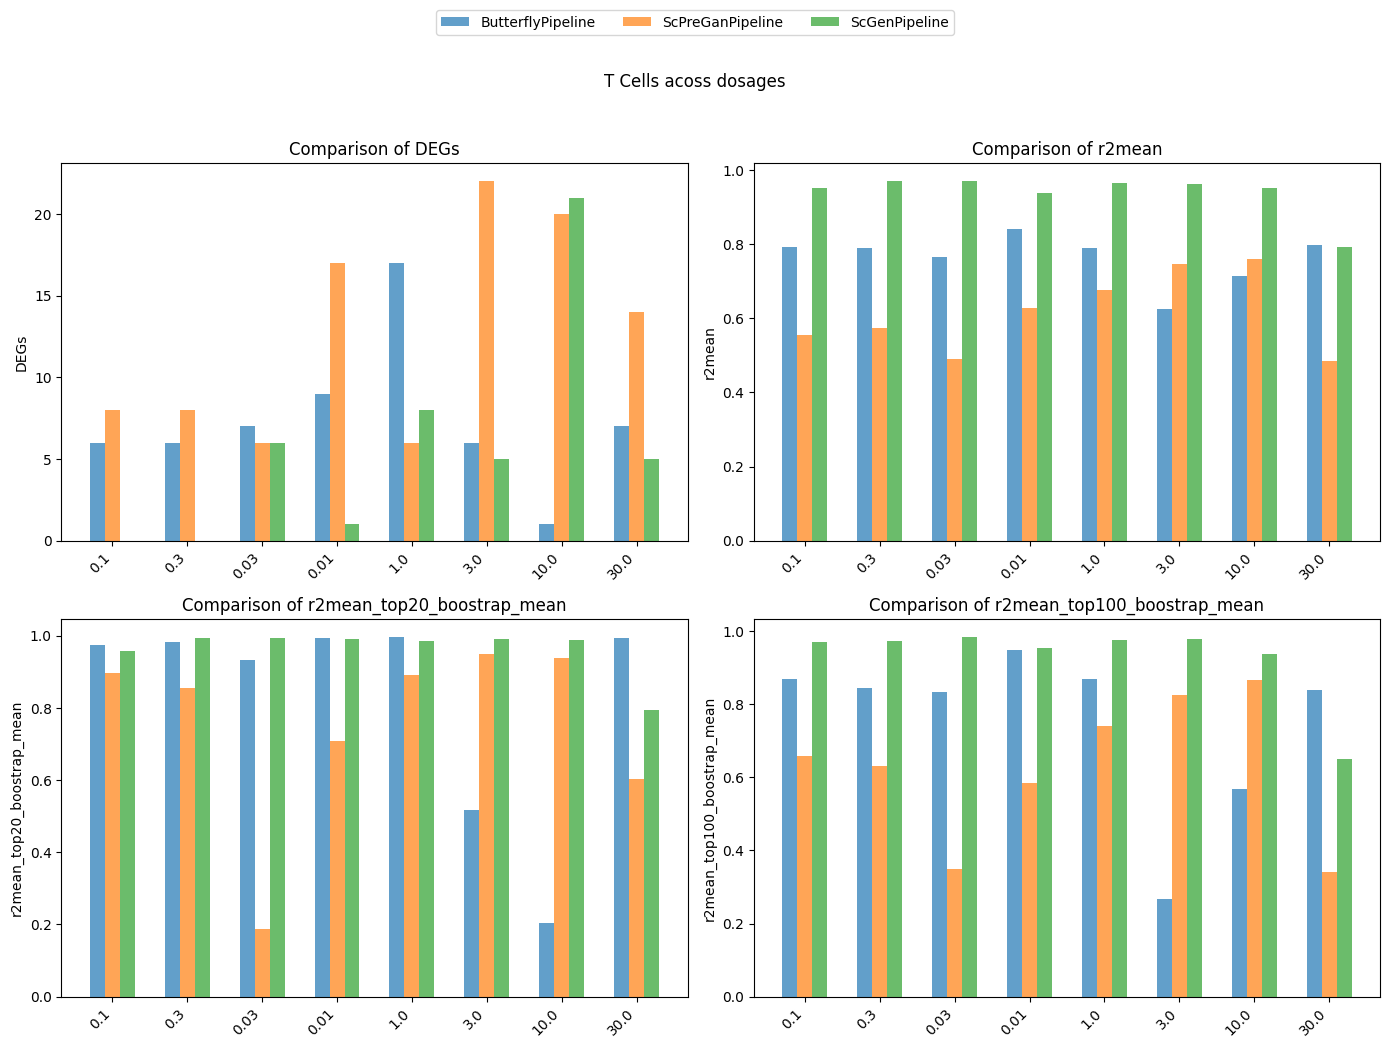

In [5]:
plot_2d_metrics_per_dosage(dataset_pipeline='NaultPipeline', cell_type='T Cells', title='T Cells acoss dosages')

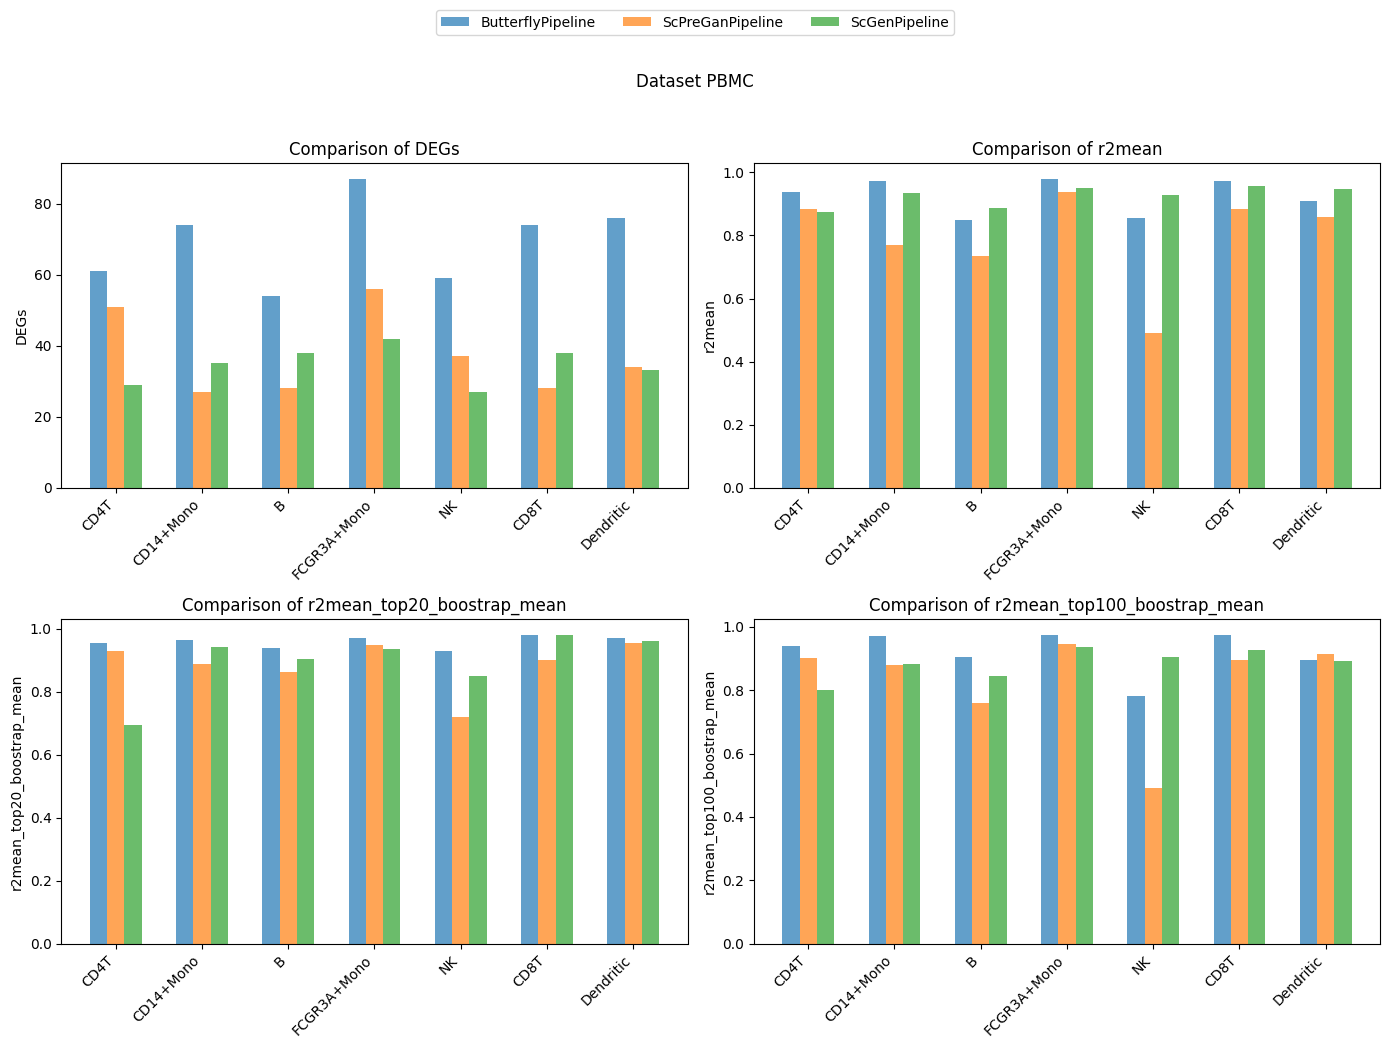

In [6]:

plot_2d_metrics_per_cell_type(dataset_pipeline='PbmcPipeline', title='Dataset PBMC')

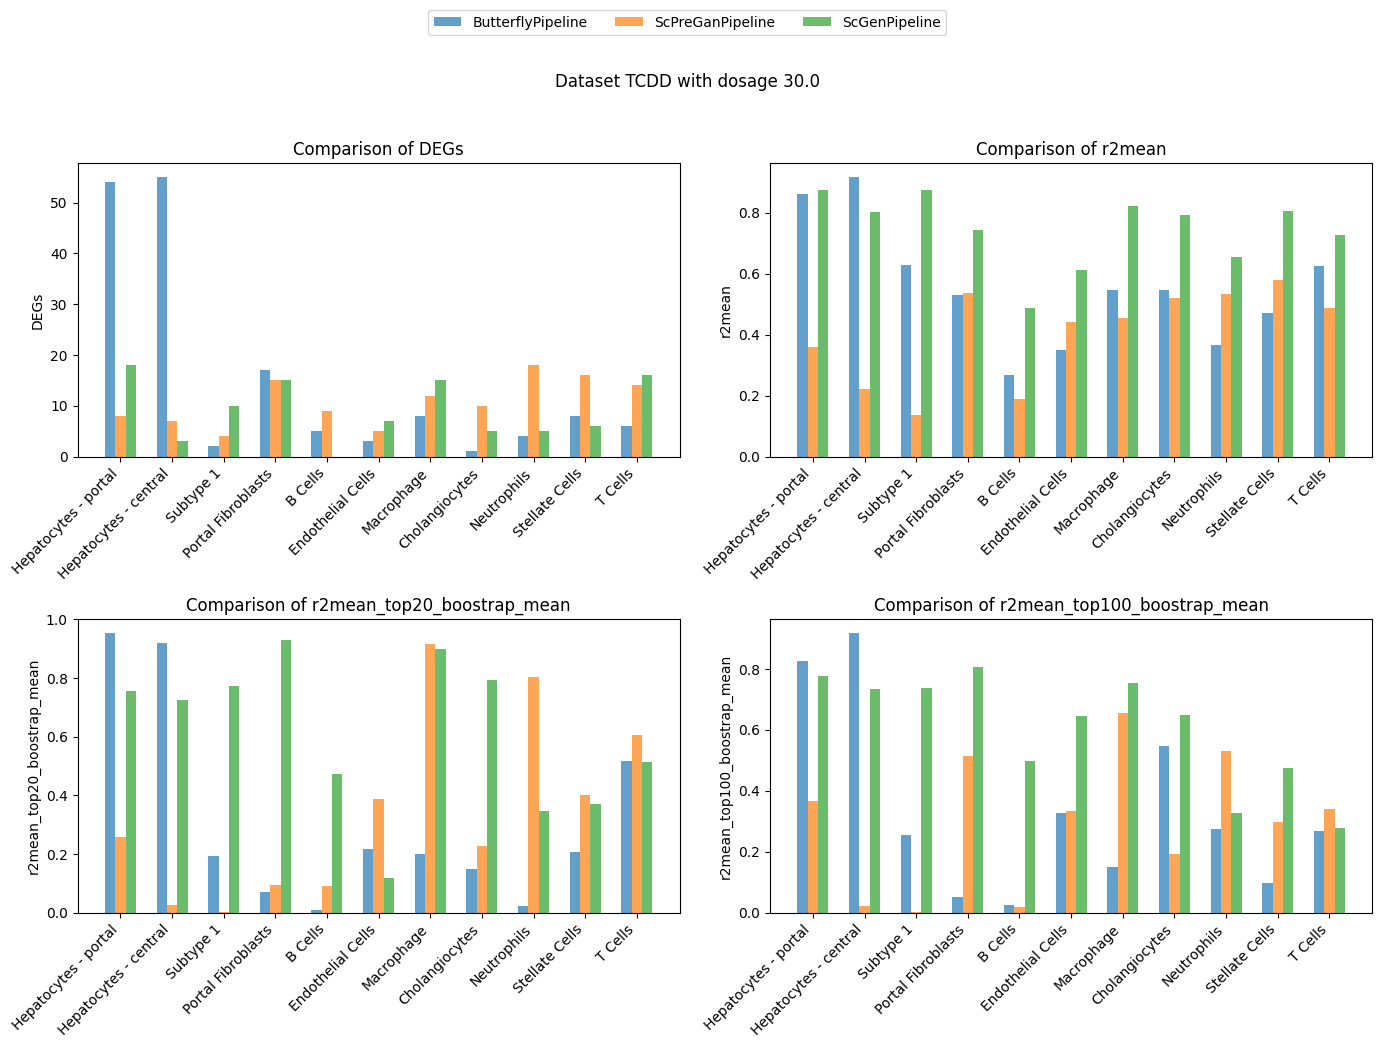

In [10]:


plot_2d_metrics_per_cell_type(dataset_pipeline="NaultPipeline", dosage=30.0, title='Dataset TCDD with dosage 30.0')


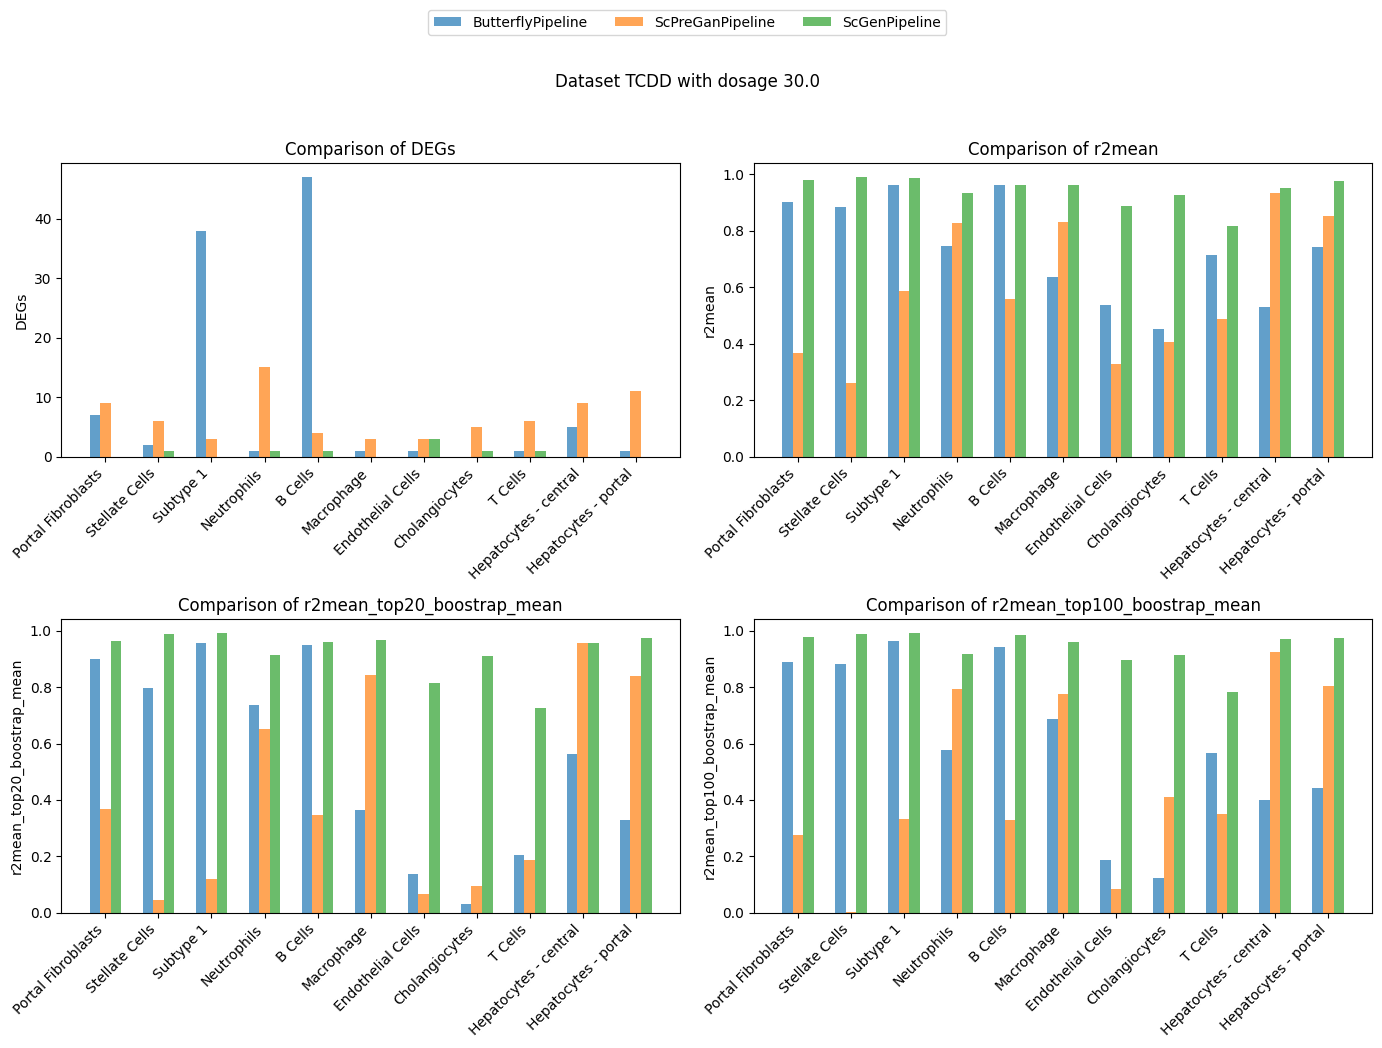

In [80]:
plot_2d_metrics_per_cell_type(dataset_pipeline="NaultPipeline", dosage=0.01, title='Dataset TCDD with dosage 30.0')


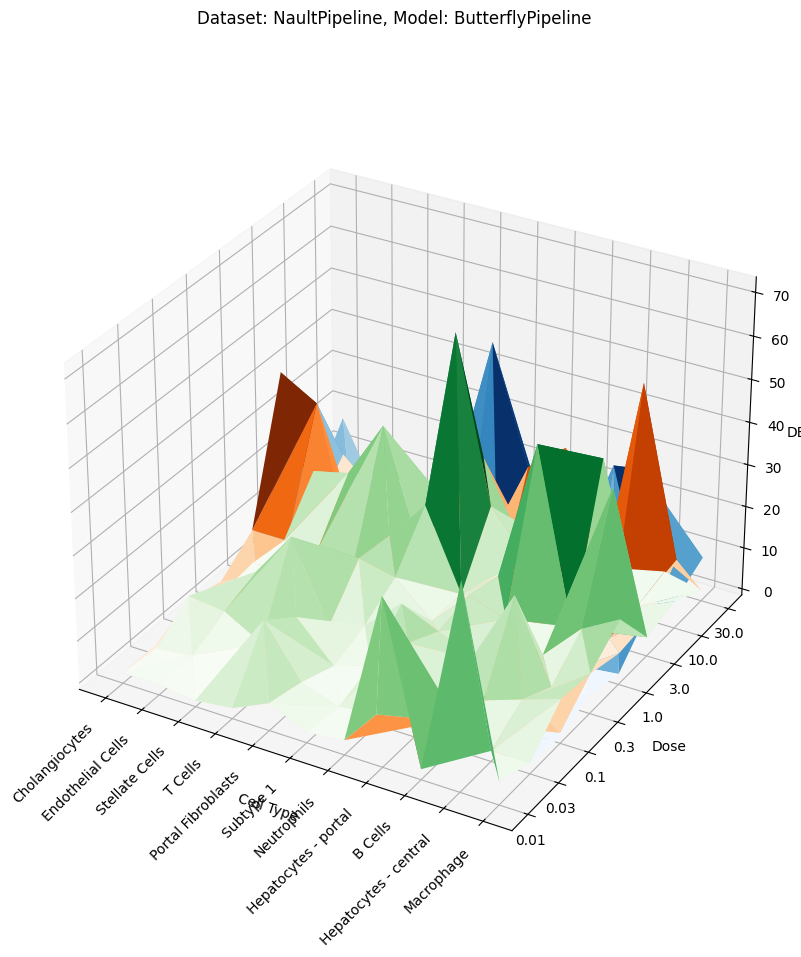

In [81]:
# 3d plot

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D


dataset = METRICS_DF[METRICS_DF['dataset'] == 'NaultPipeline'].sort_values(by=['dose'])

color_maps = {
    'ButterflyPipeline': cm.Blues,
    'ScPreGanPipeline': cm.Oranges,
    'ScGenPipeline': cm.Greens
}

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x_labels = dataset['cell_type_test'].unique().tolist()
y_labels = dataset['dose'].unique().tolist()

def per_model(model: str):
    dataset_model = dataset[dataset['model'] == model]
    x_numeric, _ = pd.factorize(dataset_model['cell_type_test'])
    y_numeric, _ = pd.factorize(dataset_model['dose'])
    ax.plot_trisurf(x_numeric, y_numeric, dataset['DEGs'], cmap=color_maps[model], linewidth=0.1)

per_model('ButterflyPipeline')
per_model('ScPreGanPipeline')
per_model('ScGenPipeline')


#Set axis labels and original tick labels
ax.set_xlabel("Cell Type")
ax.set_ylabel("Dose")
ax.set_zlabel("DEGs")

# Set original string labels on ticks
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=10)  # Rotate and adjust font size
ax.set_yticks(np.arange(len(y_labels)))
ax.set_yticklabels(y_labels, rotation=0, ha='right', fontsize=10)  # Rotate and adjust font size

fig.suptitle('Dataset: NaultPipeline, Model: ButterflyPipeline')

# Show plot
plt.show()

In [106]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np


# Filter the main dataset
dataset = METRICS_DF[METRICS_DF['dataset'] == 'NaultPipeline'].sort_values(by=['dose'])

# Define color maps for each model
color_maps = {
    'ButterflyPipeline': 'Blues',
    'ScPreGanPipeline': 'Oranges',
    'ScGenPipeline': 'Greens'
}

# Initialize the 3D plot
fig = go.Figure()

def per_model(model: str):
    dataset_model = dataset[dataset['model'] == model]
    x_numeric, x_labels = pd.factorize(dataset_model['cell_type_test'])
    y_numeric, y_labels = pd.factorize(dataset_model['dose'])
    z_values = dataset_model['DEGs']

    # Add a 3D mesh for each model
    fig.add_trace(go.Mesh3d(
        x=x_numeric, 
        y=y_numeric, 
        z=z_values,
        # alphahull=6,
        colorbar_title='DEGs',
        colorscale=color_maps[model],
        intensity=z_values,  # Intensity provides shading based on Z values
        name=model,
        opacity=0.7,
        showscale=False
    ))

# Plot each model with its corresponding color map
per_model('ButterflyPipeline')
per_model('ScPreGanPipeline')
per_model('ScGenPipeline')

# Update layout with axis labels and tick text for categorical values
fig.update_layout(
    scene=dict(
        xaxis=dict(
            title="Cell Type",
            tickvals=np.arange(len(x_labels)),
            ticktext=x_labels,
            tickangle=45,
        ),
        yaxis=dict(
            title="Dose",
            tickvals=np.arange(len(y_labels)),
            ticktext=y_labels,
        ),
        zaxis=dict(title="DEGs"),
    ),
    title="Dataset: NaultPipeline, Models Comparison",
)

# Show plot
fig.show()


In [ ]:
# compare scpregan and scpregan reproducible

scpregan_df = METRICS_DF[METRICS_DF['model'] == 'ScPreGanPipeline']
scpregan_repro_df = METRICS_DF[METRICS_DF['model'] == 'ScPreGanReproduciblePipeline']



In [112]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from pandas import DataFrame
from typing import List


def _plot_2d_metrics_scpregan(dataset: DataFrame, title: str, x_labels: List[str]):
    df_scpregan = dataset[dataset['model'] == 'ScPreGanPipeline']
    df_scpregan_repro = dataset[dataset['model'] == 'ScPreGanReproduciblePipeline']

    
    # Define unique cell types and bar positions
    x = np.arange(len(x_labels))  # Label locations
    width = 0.2  # Width of the bars for each model

    # List of metrics to plot
    metrics = ["DEGs", "r2mean", "r2mean_top20_boostrap_mean", "r2mean_top100_boostrap_mean"]

    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjust size as needed
    axes = axes.flatten()  # Flatten to easily iterate over axes

    # Plot each metric on a different subplot
    for i, metric in enumerate(metrics):
        ax = axes[i]

        # Plot each model’s bars at slightly different x positions
        bar1 = ax.bar(x - width, df_scpregan[metric], width, label='ScPreGanPipeline', alpha=0.7)
        bar2 = ax.bar(x + width, df_scpregan_repro[metric], width, label='ScPreGanReproduciblePipeline', alpha=0.7)

        # Labeling and formatting
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        ax.set_ylabel(metric)
        ax.set_title(f"Comparison of {metric}")

    # Set up a single legend by grabbing handles and labels from one of the subplots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    fig.suptitle(title)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space at the top for the legend
    plt.show()
    

def plot_2d_metrics_per_cell_type_scpregan(dataset_pipeline: str, title: str, dosage: Optional[float] = None, perturbation: Optional[str] = None):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset_pipeline]
    if dosage is not None:
        dataset = dataset[dataset['dose'] == dosage]
    if perturbation is not None:
        dataset = dataset[dataset['perturbation'] == perturbation]
        
    cell_types = dataset['cell_type_test'].unique().tolist()
    _plot_2d_metrics_scpregan(dataset=dataset, title=title, x_labels=cell_types)


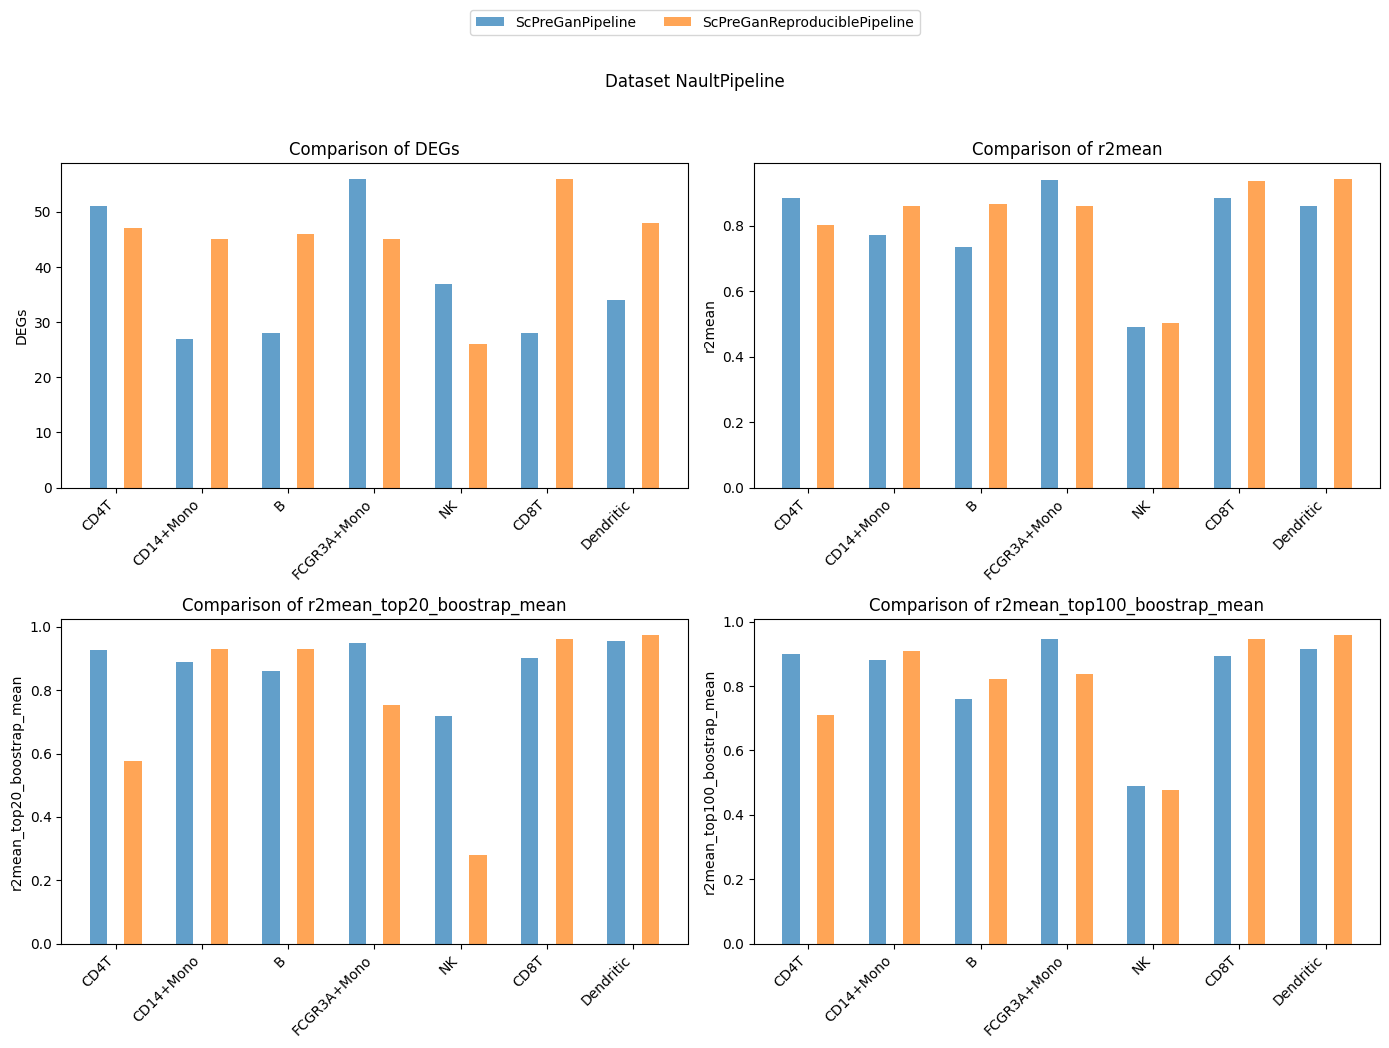

In [113]:
plot_2d_metrics_per_cell_type_scpregan(dataset_pipeline='PbmcPipeline', title='Dataset NaultPipeline')